# Оценка риска ДТП

## Описание работы

Нужно создать систему для каршеринговой компании, которая могла бы оценить риск ДТП по совокупности факторов. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать виновность в ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:

    Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
        Для модели выбрать тип виновника — только машина (car).
        Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
        Для моделирования ограничиться данными за 2012 год — они самые свежие.
        Обязательное условие — учесть фактор возраста автомобиля.
    На основе модели исследовать основные факторы ДТП.
    Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
        Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
        Какие ещё факторы нужно учесть?
        Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

### План проведения работ

**Шаг 1. Загрузим таблицы sql**

Подключимся к базе данных, используя данные:

    db_config = {
    'user': 'praktikum_student', # имя пользователя,
    'pwd': 'Sdf4$2;d-d30pp', # пароль,
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения,
    'db': 'data-science-vehicle-db' # название базы данных,
    } 

**Шаг 2. Проведём первичное исследование таблиц**

    Все ли таблицы имеют набор данных;
    Соответствует ли количество таблиц условию задачи;
    Имеется ли общий ключ для связи таблиц.

Для осмотра таблиц используем sql-запрос.

**Шаг 3. Проведём статистический анализ факторов ДТП**

    Выясним, в какие месяцы происходит наибольшее количество аварий. Проанализируем весь период наблюдений (таблица collisions).
        Создадим sql-запрос;
        Построим график;
        Сделаем вывод.
    Скоро состоится первое совещание рабочей группы. Создадим подходящие аналитические задачи, например:
        Проведём анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties);
        Найдём самые частые причины ДТП (таблица parties).
        Создадим не менее шести задач.
        Пропишем порядок решения для двух задач из списка. Обязательное условие — решение этих задач должно включать связь не менее 2-х таблиц. Пример прописанного порядка:
            Создайте sql-запрос;
            Постройте график;
            Сделайте вывод.

**Шаг 4. Создадим модель для оценки водительского риска**

    Подготовим набор данных на основе первичного предположения заказчика:
        Выберем тип виновника — только машина (car).
        Возьмём случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
        Для моделирования возьмём данные только за 2012 год.
        Подготовка исходной таблицы должна проводиться с помощью sql-запроса.
    Проведём первичный отбор факторов, необходимых для модели.

Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность ДТП.
Пример:

columms =['party_type',     # Тип участника происшествия. Таблица parties
          'party_sobriety', # Уровень трезвости виновника (точно может влиять) Таблица parties
           ......
         ] 

    Проведём статистическое исследование отобранных факторов.
        По результату исследовательского анализа внесём корректировки, если они нужны.
        Если необходимо, категоризируем исходные данные, проведём масштабирование.
        Подготовим обучающую и тестовую выборки.

**Шаг 5. Найдём лучшую модель**

    Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
    1–2 модели из классического машинного обучения;
    1–2 модели из бустингов.
    Выберем метрику для оценки модели, исходя из поставленной бизнесом задачи.
    Оформим вывод в виде сравнительной таблицы.

**Шаг 6. Проверим лучшую модель в работе**

    Проведём графический анализ «Матрица ошибок». Выведем полноту и точность на график.
    Проанализируем важность основных факторов, влияющих на вероятность ДТП.
    Для одного из выявленных важных факторов проведём дополнительное исследование:
        Покажем график зависимости фактора и целевой переменной.
        Предложим, чем можно оборудовать автомобиль, чтобы учесть этот фактор во время посадки водителя.

Пример решения задачи:
Выявили, что самый важный фактор ДТП — уровень трезвости виновника party_sobriety. Из таблицы исходных данных известно: есть несколько уровней трезвости. Тогда решение по пунктам выглядит так:

    Для графического анализа будем использовать столбчатую диаграмму. В ней отразим зависимость числа ДТП от уровня трезвости. Проанализируем график, сделаем выводы.
    Предложим оборудовать автомобиль анализатором алкогольного опьянения. Измерение состояния при посадке сделать обязательным условием допуска за руль. А чтобы убедиться, что в трубку дышит именно водитель, добавить камеру, направленную на водительское место.

**Шаг 7. Сделаем общий вывод по модели**

    Кратко опишем лучшую модель.
    Сделаем вывод: насколько возможно создание адекватной системы оценки риска при выдаче авто?
    Какие факторы ещё необходимо собирать, чтобы улучшить модель?

### Краткое описание таблиц

    collisions — общая информация о ДТП
    Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
    parties — информация об участниках ДТП
    Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and party_number.
    vehicles — информация о пострадавших машинах
    Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

## Загрузим таблицы sql

Установим дополнительные библиотеки.

In [1]:
!pip install pandas_profiling -q
!pip install shap -q

Импортируем необходимые библиотеки.

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import shap

from sqlalchemy import create_engine

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import lightgbm as lgb

from catboost import CatBoostClassifier

shap.initjs()

C:\Users\User\AppData\Local\Temp\ipykernel_6216\2468375511.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Объявим глобальные перменные.

In [3]:
SEED = 31416

Объявим конфигурацию для подключения к серверу.

In [4]:
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-science-vehicle-db' # название базы данных
}

Формируем строку для подключения.

In [5]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

Создадим соединение.

In [6]:
engine = create_engine(connection_string)

Создадим пробный запрос.

In [7]:
query = '''
SELECT COUNT(DISTINCT id) AS count_parties
  FROM parties
 WHERE at_fault = 1;
'''
df = pd.read_sql_query(query, con=engine)
df.head()

,count_parties
0,1288127


### Выводы

Мы успешно подключились к серверу и смогли подсчитать всех уникальных виновников ДТП. Перейдём к исследованию таблиц.

## Проведём первичное исследование таблиц

Сначала осмотрим сами таблицы.

Посмотрим на размер нашей БД.

In [8]:
query = '''
SELECT pg_size_pretty(pg_database_size(current_database()));
'''
df = pd.read_sql_query(query, con=engine)
df

,pg_size_pretty
0,789 MB


Посмотрим названия таблиц в БД.

In [9]:
query = '''
SELECT table_name
  FROM information_schema.tables
 WHERE table_schema NOT IN ('information_schema','pg_catalog');
'''
df = pd.read_sql_query(query, con=engine)
df

,table_name
0,case_ids
1,collisions
2,parties
3,vehicles


Посмотрим какие колонки имеются в наших таблицах и какой тип данных они имеют.

In [10]:
query = '''
SELECT table_name, 
       column_name, 
       data_type 
  FROM information_schema.columns
 WHERE table_name IN ('case_ids', 'collisions', 'parties', 'vehicles');
'''
df = pd.read_sql_query(query, con=engine)
df

,table_name,column_name,data_type
0,case_ids,case_id,text
1,case_ids,db_year,text
2,collisions,case_id,text
3,collisions,county_city_location,text
4,collisions,county_location,text
5,collisions,distance,real
6,collisions,direction,text
7,collisions,intersection,integer
8,collisions,weather_1,text
9,collisions,location_type,text


Посмотрим на первичные и внешние ключи.

In [11]:
query = '''
SELECT constraint_name,
       table_name,
       column_name
  FROM information_schema.key_column_usage
'''
df = pd.read_sql_query(query, con=engine)
df

,constraint_name,table_name,column_name
0,case_ids_pk,case_ids,case_id
1,parties_pk,parties,id
2,vehicles_pk,vehicles,id
3,collisions_case_ids_case_id_fk,collisions,case_id
4,parties_case_ids_case_id_fk,parties,case_id
5,vehicles_case_ids_case_id_fk,vehicles,case_id


Похоже, что в таблице `collisions` отсутствует первичный ключ. Проверим уникальность значений столбца `case_id`.

In [12]:
query = '''
SELECT COUNT(case_id) AS total_ids,
       COUNT(DISTINCT case_id) AS unique_ids
  FROM collisions;
'''
df = pd.read_sql_query(query, con=engine)
df

,total_ids,unique_ids
0,1400000,1400000


Значения уникальны.

Также стоит отметить, что первичный ключ в таблицах `parties` и `vehicles` не совпадает с внешним ключом к таблице `case_ids`, т.к. одному case_id может быть сопоставлено несколько id из этих таблиц.

### Выводы

Мы осмотрели данные и убедились что с ними всё в порядке. Перейдём к статистическому анализу.

## Проведём статистический анализ факторов ДТП

### Количество аварий в зависимости от месяца

In [13]:
query = '''
SELECT COUNT(case_id) AS total_ids,
       DATE_TRUNC('month', collision_date)::date AS month
  FROM collisions
 GROUP BY DATE_TRUNC('month', collision_date)
 ORDER BY DATE_TRUNC('month', collision_date);
'''
df = pd.read_sql_query(query, con=engine)

Построим график зависимости количества столкновений от даты округлённой до месяца.

In [ ]:
fig = px.bar(
    df, x='month', y='total_ids',
    barmode='group',
    title=('Статистика происшествий по месяцам')
)
fig.show()

Из графика видно что статистика собрана в полной мере только до мая 2012, затем в датасете идут лишь единичные случаи.

Если рассматривать зону с большим покрытием (до мая 2012), то видно несколько трендов:
   * минимальное количество аварий происходит в январе-феврале, что может объясняться общим снижением поездок в праздничные дни в январе и уже привыкшими к зимним условиям водителям;
   * пик аварий все три года приходится на октябрь, что может быть связано с первыми заморозками и снегом, а также не успевшими адаптироваться водителями;


   
Создадим дополнительные аналитические задачи:
   * Проведём анализ серьёзности повреждений ТС, исходя из состояния водителя (collisions + parties);
   * Проведём анализ серьёзности повреждений ТС, исходя из типа участника ДТП (collisions + parties);
   * Проведём анализ серьёзности повреждений ТС в зависимости от года выпуска автомобиля(collisions + vehicles);
   * Проведём анализ основных факторов ДТП в зависимости от состояния водителя (collisions + parties);
   * Проведём анализ категорий выявленных нарушений ДТП в зависимости от типа кузова автомобиля (collisions + vehicles);
   * Проведём анализ типа столкновения в зависимости от того разговаривал водитель по телефону или нет (collisions + parties).


   
### Серьёзность повреждений ТС, исходя из состояния водителя

In [15]:
query = '''
SELECT c.collision_damage,
       p.party_drug_physical
  FROM collisions AS c
       JOIN parties AS p ON c.case_id = p.case_id
 WHERE p.party_drug_physical IN ('not applicable', 'G');
'''
df = pd.read_sql_query(query, con=engine)

In [ ]:
fig = px.histogram(
    df, x='party_drug_physical', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от физического состояния водителя (количество)',
    histfunc='count',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig.show()

В случае когда состояние о физическом состоянии неизвестно или не применимо - статистика видов повреждения очень похожа. БОльшая часть аварий заканчивается получением малых повреждений или царапинами.

In [17]:
query = '''
SELECT c.collision_damage,
       p.party_drug_physical
  FROM collisions AS c
       JOIN parties AS p ON c.case_id = p.case_id
 WHERE p.party_drug_physical IN ('under drug influence', 'sleepy/fatigued', 'impairment - physical');
'''
df = pd.read_sql_query(query, con=engine)

In [ ]:
fig = px.histogram(
    df, x='party_drug_physical', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от физического состояния водителя (количество)',
    histfunc='count',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig2 = px.histogram(
    df, x='party_drug_physical', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от физического состояния водителя (проценты)',
    histfunc='count',
    histnorm='percent',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig.show()
fig2.show()

Глядя на график можно сделать следующие выводы:
   * Количество аварий с фатальными повреждениями ТС существенно выше в случае если водитель находится под воздействием лекарств (на них приходится больше 90% всех случаев), усталость и сонливость почти не влияют на риск ДТП с тяжёлыми последствиями.
   * Количество ДТП под лекарственными веществами и в сонном состоянии в количественном соотношении равны. Количество ДТП связанных с ухудшением физического состояния ощутимо меньше.
   * В целом соотношение типов ДТП совпадает за исключением процента тяжёлых ДТП.
   
Напрашивается вывод о необходимости проверки водителя садящегося в машину на воздействие лекарственных веществ, но без медицинских анализов сделать это проблематично.

### Серьёзность повреждений ТС, исходя из типа участника ДТП

In [19]:
query = '''
SELECT c.collision_damage,
       p.party_type
  FROM collisions AS c
       JOIN parties AS p ON c.case_id = p.case_id
 WHERE party_type NOT IN ('other');
'''
df = pd.read_sql_query(query, con=engine)

In [ ]:
fig = px.histogram(
    df, x='party_type', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от типа участника ДТП (количество)',
    histfunc='count',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig2 = px.histogram(
    df, x='party_type', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от типа участника ДТП (проценты)',
    histfunc='count',
    histnorm='percent',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig.show()
fig2.show()

Из гистограмм можно сделать следующие выводы:
   * 80-90% всех ДТП происходят с участием других автомобилей;
   * Из остальных видов ДТП по количеству также выделяются ДТП с участием дорожных знаков, приводящие к небольшим повреждениям.
   * При оценки процентного соотношения выбиваются ДТП с тотальными повреждениями с участием отбойников (вероятно, потеря управления на скорости и вылет в отбойник).

### Серьёзность повреждений ТС в зависимости от года выпуска автомобиля

In [21]:
query = '''
SELECT c.collision_damage,
       v.vehicle_age
  FROM collisions AS c
       JOIN vehicles AS v ON c.case_id = v.case_id;
'''
df = pd.read_sql_query(query, con=engine)

In [22]:
df.drop(index=df[df['vehicle_age'] > 17].index, inplace=True)

In [ ]:
fig = px.histogram(
    df, x='vehicle_age', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от возраста ТС (количество)',
    histfunc='count',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig2 = px.histogram(
    df, x='vehicle_age', color='collision_damage',
    barmode='group',
    title='Зависимость тяжести ДТП от возраста ТС (проценты)',
    histfunc='count',
    histnorm='percent',
    category_orders={
        'collision_damage': ['fatal', 'severe damage', 'middle damage', 'small damage', 'scratch']
    }
)
fig.show()
fig2.show()

Из гистограмм мы можем сделать следующие выводы:
   * Начиная с третьего года владения ТС доля аварий с незначительными повреждениями `scratch` сильно вырастает, что может быть связано с тем что автомобилисты бережней относятся к явно более новым машинам.
   * Начиная с шестого года владения увеличивается доля ДТП с фатальными повреждениями.
   * С возрастом постепенно меняется соотношение типов аварий, становится меньше лёгких и больше тяжёлых аварий, возможно, сказывается техническое состояние автомобилей.
   
Остальные аналитические задачи оставим нашим коллегам, алгоритм решения у них одинаковый:
   * выгрузка данных из базы;
   * очистка данных, если необходимо;
   * построение графиков и их анализ.

### Выводы

Мы провели статистичный анализ факторов ДТП, создали задачи для наших коллег, самостоятельно решили следующие:
   * Выяснили, в какие месяцы происходит наибольшее количество аварий.
   * Проанализировали зависимость серьёзности последствий ДТП в зависимости от состояния здоровья водителя.
   * Проанализировали зависимость серьёзности последствий ДТП в зависимости от типа участника ДТП.
   * Проанализировали зависимость серьёзности последствий ДТП в зависимости от года выпуска автомобиля.
   
Перейдём к созданию модели для оценки водительского риска.

## Создадим модель для оценки водительского риска

Выгрузим данные по заданию заказчика:
   * тип виновника - car;
   * степень повреждений ТС - все кроме scratch;
   * дата столкновения - 2012 год.

In [24]:
query = '''
SELECT *
  FROM parties AS p
       FULL JOIN vehicles AS v ON p.case_id = v.case_id AND p.party_number = v.party_number
       FULL JOIN collisions AS c ON p.case_id = c.case_id
 WHERE p.party_type = 'car'
       AND c.collision_damage != 'scratch'
       AND c.collision_date BETWEEN '2012-01-01' AND '2012-12-31';
'''
df = pd.read_sql_query(query, con=engine)

Проведём EDA.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196837 entries, 0 to 196836
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           196837 non-null  int64  
 1   case_id                      196837 non-null  object 
 2   party_number                 196837 non-null  int64  
 3   party_type                   196837 non-null  object 
 4   at_fault                     196837 non-null  int64  
 5   insurance_premium            176607 non-null  float64
 6   party_sobriety               193212 non-null  object 
 7   party_drug_physical          25148 non-null   object 
 8   cellphone_in_use             171464 non-null  float64
 9   id                           56248 non-null   float64
 10  case_id                      56248 non-null   object 
 11  party_number                 56248 non-null   float64
 12  vehicle_type                 56248 non-null   object 
 13 

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,196837.0,2.589799e+06,97569.718519,1687780.0,2511773.00,2593207.0,2673872.00,2752408.0
party_number,196837.0,1.507745e+00,0.665083,1.0,1.00,1.0,2.00,10.0
at_fault,196837.0,5.235144e-01,0.499448,0.0,0.00,1.0,1.00,1.0
insurance_premium,176607.0,3.894500e+01,16.230328,0.0,25.00,36.0,50.00,105.0
cellphone_in_use,171464.0,2.363178e-02,0.151899,0.0,0.00,0.0,0.00,1.0
id,56248.0,1.429235e+06,54399.757417,985527.0,1386472.75,1432047.0,1476086.25,1517653.0
party_number,56248.0,1.527432e+00,0.662507,1.0,1.00,1.0,2.00,9.0
vehicle_age,54554.0,4.856472e+00,3.234503,0.0,3.00,4.0,7.00,161.0
distance,196837.0,6.624782e+02,7915.264303,0.0,10.00,100.0,500.00,1584000.0
intersection,195850.0,2.018994e-01,0.401419,0.0,0.00,0.0,0.00,1.0


Изучим описание факторов. Нужно отобрать те, которые могут влиять на вероятность стать виновником ДТП.

| Название колонки            | Краткое описание | Влияние на вероятность стать виновником ДТП | Вердикт  |
|:----------------------------|:-----------------|:--------------------------------------------|:---------|
| id                          | уникальный номер | не влияет                                   | удалить  |
| case_id                     | номер случая     | не влияет                                   | удалить  |
| party_number                | номер участника  | не влияет                                   | удалить  |
| party_type                  | тип участника    | брали только машины, не влияет              | удалить  |
| at_fault                    | виновность       | целевой признак                             | оставить |
| insurance_premium           | страховая премия | косвенно может влиять                       | оставить |
| party_sobriety              | трезвость        | влияет                                      | оставить |
| party_drug_physical         | состояние участ. | влияет                                      | оставить |
| cellphone_in_use            | разговор по тел. | влияет                                      | оставить |
| vehicle_type                | тип кузова       | может влиять                                | оставить |
| vehicle_transmission        | тип трансмиссии  | может влиять                                | оставить |
| vehicle_age                 | возраст авто     | влияет                                      | оставить |
| county_location             | регион           | если столкновение с объектами - может       | оставить |
| distance                    |расстояние до ц.д.| если столкновение с объектами - может       | оставить |
| direction                   | направление      | может влиять                                | оставить |
| intersection                | перекрёсток ли   | если столкновение с объектами - может       | оставить |
| weather_1                   | погода           | если столкновение с объектами - может       | оставить |
| location_type               | тип дороги       | если столкновение с объектами - может       | оставить |
| collision_damage            | урон             | может влиять                                | оставить |
| party_count                 | количество уч.   | может влиять                                | оставить |
| primary_collision_factor    | гл. фактор ДТП   | может влиять                                | оставить |
| pcf_violation_category      | кат. нарушения   | может влиять                                | оставить |
| type_of_collision           | тип столкновения | может влиять                                | оставить |
| motor_vehicle_involved_with | тип участников   | влияет                                      | оставить |
| road_surface                | тип покрытия     | если столкновение с объектами - может       | оставить |
| road_condition_1            | состояние дороги | если столкновение с объектами - может       | оставить |
| lighting                    | освещённость     | если столкновение с объектами - может       | оставить |
| control_device              | устройство слеж. | может влиять                                | оставить |
| collision_date              | дата ДТП         | объяснено другими столбцами                 | удалить  |
| collision_time              | время ДТП        | объяснено другими столбцами                 | удалить  |

Почистим данные.

In [27]:
df.drop(columns=[
    'case_id', 'id', 'party_number', 'county_city_location', 'collision_date', 'collision_time', 'party_type'
], inplace=True, errors='ignore')

Удалим дубликаты.

In [28]:
df.drop_duplicates(inplace=True, ignore_index=True)

Переименуем отличные от PEP8 названия.

In [29]:
df.rename(columns={'weather_1':'weather', 'road_condition_1':'road_condition'}, inplace=True)

Осмотрим данные.

In [30]:
df.profile_report(correlations=None, interactions=None).to_file('initial_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Что необходимо исправить:

   * Необходимо убрать экстремальные значения из столбца `distance` и `vehicle_age`.
   * Необходимо обработать пропуски в столбце `direction`, поскольку значения категориальные и пропущенных много, можно сделать дополнительную категорию `unknown`.
   * В столбце `location_type` много пропусков, судя по остальным категориям, оставшаяся - просто аварии на дороге, проставим категорию `road`.
   * В столбцах `primary_collision_factor` и `pcf_violation_category` есть пропуски и есть категория `unknown`, присвоим пропускам её.
   * Столбец `insurance_premium` попробуем заполнить Imputer'ом.
   * В столбце `party_sobriety` есть категория `impairment unknown`, перенесём NaN'ы туда.
   * В столбце `party_drug_physical` много пропусков, но при этом есть категория `G`, переименуем в `impairment unknown`, перенесём NaN'ы туда.
   * В столбце `vehicle_type` 4 значения `other`, отбросим, запишем пропуски в категорию `unknown`, также для столбца `vehicle_transmission`.
   * Столбец `vehicle_age` придётся заполнять Imputer'ом.
   * В столбец `cellphone_in_use` также добавим категорию `unknown`.

In [31]:
df.drop(index=df[df['distance'] > df['distance'].quantile(0.99)].index, inplace=True)

df.drop(index=df[df['vehicle_age'] > df['vehicle_age'].quantile(0.99)].index, inplace=True)

df['direction'] = df['direction'].fillna('unknown')

df['location_type'] = df['location_type'].fillna('road')

df['primary_collision_factor'] = df['primary_collision_factor'].fillna('unknown')

df['pcf_violation_category'] = df['pcf_violation_category'].fillna('unknown')

df['party_sobriety'] = df['party_sobriety'].fillna('impairment unknown')

df['party_drug_physical'] = df['party_drug_physical'].fillna('impairment unknown')
df['party_drug_physical'] = df['party_drug_physical'].replace('G', 'impairment unknown')

df.drop(index=df[df['vehicle_type'] == 'other'].index, inplace=True)
df['vehicle_type'] = df['vehicle_type'].fillna('unknown')

df['vehicle_transmission'] = df['vehicle_transmission'].fillna('unknown')

df['cellphone_in_use'] = df['cellphone_in_use'].fillna('unknown')
df['cellphone_in_use'] = df['cellphone_in_use'].replace(0, 'no')
df['cellphone_in_use'] = df['cellphone_in_use'].replace(1, 'yes')

df['intersection'] = df['intersection'].replace(0, 'no')
df['intersection'] = df['intersection'].replace(1, 'yes')

imputer = SimpleImputer(strategy='median')
df[['insurance_premium', 'vehicle_age']] = imputer.fit_transform(df[['insurance_premium', 'vehicle_age']])

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Изменим типы данных.

In [32]:
numeric = [
    'at_fault', 'insurance_premium', 'distance', 'party_count', 'vehicle_age'
]

category = [
    'party_sobriety', 'party_drug_physical',
    'cellphone_in_use', 'vehicle_type', 'vehicle_transmission',
    'county_location', 'direction',
    'intersection', 'weather', 'location_type',
    'collision_damage', 'primary_collision_factor', 'pcf_violation_category',
    'type_of_collision', 'motor_vehicle_involved_with', 'road_surface',
    'road_condition', 'lighting', 'control_device'
]

df = df.astype({
    **{_:'int' for _ in numeric},
    **{_:'category' for _ in category}
})

Посмотрим на результат.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184179 entries, 0 to 184178
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   at_fault                     184179 non-null  int32   
 1   insurance_premium            184179 non-null  int32   
 2   party_sobriety               184179 non-null  category
 3   party_drug_physical          184179 non-null  category
 4   cellphone_in_use             184179 non-null  category
 5   vehicle_type                 184179 non-null  category
 6   vehicle_transmission         184179 non-null  category
 7   vehicle_age                  184179 non-null  int32   
 8   county_location              184179 non-null  category
 9   distance                     184179 non-null  int32   
 10  direction                    184179 non-null  category
 11  intersection                 184179 non-null  category
 12  weather                      184179 non-null

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
at_fault,184179.0,0.522731,0.499484,0.0,0.0,1.0,1.0,1.0
insurance_premium,184179.0,38.652067,15.372664,0.0,26.0,36.0,49.0,105.0
vehicle_age,184179.0,4.220595,1.638124,0.0,4.0,4.0,4.0,13.0
distance,184179.0,488.440115,965.883696,0.0,15.0,110.0,500.0,7920.0
party_count,184179.0,2.112597,0.729131,1.0,2.0,2.0,2.0,12.0


Выглядит намного лучше. Повторно посмотрим на полученный датасет.

In [35]:
df.profile_report(minimal=True).to_file('final_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Разделим данные на обучающие и тестовые для features(X) и target(y).

In [36]:
X = df.drop(['at_fault'], axis=1)
y = df['at_fault']

X, X_test, y, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=SEED,
    stratify=y
)

Проверим корректность разделения на выборки.

In [37]:
print(f'Доля тренировочных признаков: {X.shape[0]/df.shape[0]:.2f}')
print(f'Доля тренировочных целей: {y.shape[0]/df.shape[0]:.2f}')
print(f'Доля тестовых признаков: {X_test.shape[0]/df.shape[0]:.2f}')
print(f'Доля тестовых целей: {y_test.shape[0]/df.shape[0]:.2f}')
print(f'Доля положительных целей на тренировочных данных: {y.astype("int").mean():.2f}')
print(f'Доля положительных целей на тестовых данных: {y_test.astype("int").mean():.2f}')

Доля тренировочных признаков: 0.80
Доля тренировочных целей: 0.80
Доля тестовых признаков: 0.20
Доля тестовых целей: 0.20
Доля положительных целей на тренировочных данных: 0.52
Доля положительных целей на тестовых данных: 0.52


### Выводы

Мы подготовили набор данных на основе требований заказчика. Обработали данные: убрали аномалии, почистили, заполнили где это возможно. Избавились от пропусков и дубликатов, поменяли типы данных на более рациональные, что позволило значительно уменьшить размер базы данных.

Можно переходить к работе с моделями машинного обучения.

## Найдём лучшую модель

Смоделируем не менее 3-х типов моделей с перебором гиперпараметров.
3 модели из классического машинного обучения;
1 модель из бустингов.
Метрику для оценки модели, исходя из поставленной бизнесом задачи выберем F1.
Оформим вывод в виде сравнительной таблицы.

### DummyClassifier

Для начала создадим baseline из DummyClassifier'а.

In [38]:
%%time

model_dc = DummyClassifier(strategy='most_frequent')
model_dc.fit(X, y)
prediction_dc = model_dc.predict(X_test)

CPU times: total: 15.6 ms
Wall time: 7 ms


In [39]:
cr_dc = classification_report(
    y_test, prediction_dc,
    output_dict=True, zero_division=0
)

results = {} # словарь со сводными результатами для всех моделей
results['Dummy Classifier (most frequent)'] = cr_dc['weighted avg']

pd.DataFrame(cr_dc).round(decimals=3).transpose()

,precision,recall,f1-score,support
0,0.000,0.000,0.000,17581.000
1,0.523,1.000,0.687,19255.000
accuracy,0.523,0.523,0.523,0.523
macro avg,0.261,0.500,0.343,36836.000
weighted avg,0.273,0.523,0.359,36836.000


Ожидаемо плохой результат. Посмотрим на модель линейной регрессии.

### LogisticRegression

Создадим трансформер для различных колонок, в случае с "линейными" моделями к категориальным применим OHE, к числовым - StandardScaler.

In [40]:
linear_transformer = make_column_transformer(
    (
        OneHotEncoder(
            dtype='uint8',
            handle_unknown='ignore'
        ), make_column_selector(dtype_include=['category', 'object'])
    ),
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)

Соберём pipeline для линейной регрессии.

In [41]:
pipe_lr = make_pipeline(
    linear_transformer,
    LogisticRegression(
        class_weight='balanced',
        random_state=SEED,
        n_jobs=-1
    )
)

Зададим сетку параметров и создадим estimator.

In [42]:
param_grid = {
    'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__C':[.001, .01],
    'logisticregression__max_iter':[500, 1000]
}

gs_lr = GridSearchCV(
    pipe_lr,
    param_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Проведём обучение с кросс-валидацией выбранного оценщика.

In [43]:
%time gs_lr.fit(X, y)
None

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 4.31 s
Wall time: 1min 13s


Посмотрим на результаты лучшей модели и залогируем результат.

In [44]:
prediction_lr = gs_lr.predict(X_test)

cr_lr = classification_report(
    y_test, prediction_lr,
    output_dict=True, zero_division=0
)

results['Logistic Regression'] = cr_lr['weighted avg']

pd.DataFrame(cr_lr).round(decimals=3).transpose()

,precision,recall,f1-score,support
0,0.652,0.856,0.740,17581.000
1,0.816,0.582,0.680,19255.000
accuracy,0.713,0.713,0.713,0.713
macro avg,0.734,0.719,0.710,36836.000
weighted avg,0.738,0.713,0.708,36836.000


Модель чуть лучше предсказывает нулевой класс, но в целом значения ощутимо лучше чем на baseline.

### RandomForestClassifier

Создадим трансформер для различных колонок, в случае с "деревянными моделями" к категориальным применим OE, числовые оставим как есть.

In [45]:
ensemble_transformer = make_column_transformer(
    (
        OrdinalEncoder(
            dtype='int16',
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), make_column_selector(dtype_include=['category', 'object'])
    ),
    remainder='passthrough'
)

Создадим pipeline для классификатора RandomForestClassifier().

In [46]:
pipe_rf = make_pipeline(
    ensemble_transformer,
    RandomForestClassifier(
        random_state=SEED,
        n_jobs=-1,
        class_weight='balanced',
        verbose=0
    )
)

Зададим сетку параметров и создадим estimator.

In [47]:
param_grid = {
    'randomforestclassifier__n_estimators':np.arange(100, 151, 50),
    'randomforestclassifier__max_depth':np.arange(1, 10, 2),
}

gs_rf = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Проведём обучение с кросс-валидацией выбранного оценщика.

In [48]:
%time gs_rf.fit(X, y)
None

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 44 s
Wall time: 2min 7s


Посмотрим на результаты лучшей модели и залогируем результат.

In [49]:
prediction_rf = gs_rf.predict(X_test)

cr_rf = classification_report(
    y_test, prediction_rf,
    output_dict=True, zero_division=0
)

results['Random Forest Classifier'] = cr_rf['weighted avg']

pd.DataFrame(cr_rf).round(decimals=3).transpose()

,precision,recall,f1-score,support
0,0.638,0.929,0.756,17581.000
1,0.888,0.519,0.655,19255.000
accuracy,0.715,0.715,0.715,0.715
macro avg,0.763,0.724,0.706,36836.000
weighted avg,0.769,0.715,0.704,36836.000


Результаты сходные с линейной регрессией. Попробуем ещё один популярный алгоритм.

### LinearSVC

Создадим pipeline для модели.

In [50]:
pipe_svc = make_pipeline(
    linear_transformer,
    LinearSVC(
        class_weight='balanced',
        random_state=SEED
    )
)

Зададим сетку параметров и создадим estimator.

In [51]:
param_grid = {
    'linearsvc__loss':['hinge', 'squared_hinge'],
    'linearsvc__C':[0.0001, .001, .01]
}

gs_svc = GridSearchCV(
    pipe_svc,
    param_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Проведём обучение с кросс-валидацией выбранного оценщика.

In [52]:
%time gs_svc.fit(X, y)
None

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2.16 s
Wall time: 16.3 s


Посмотрим на результаты лучшей модели и залогируем результат.

In [53]:
prediction_svc = gs_svc.predict(X_test)

cr_svc = classification_report(
    y_test, prediction_svc,
    output_dict=True, zero_division=0
)

results['Support Vector Classifier'] = cr_svc['weighted avg']

pd.DataFrame(cr_svc).round(decimals=3).transpose()

,precision,recall,f1-score,support
0,0.645,0.878,0.743,17581.000
1,0.834,0.558,0.669,19255.000
accuracy,0.711,0.711,0.711,0.711
macro avg,0.739,0.718,0.706,36836.000
weighted avg,0.743,0.711,0.704,36836.000


Схожие результаты, попробуем использовать бустинги.

### LightGBM

Для работы с библиотекой необходимо перевести все категориальные признаки в целые числа. Воспользуемся определённым ранее трансформером для ансамблей.

Создадим pipeline для классификатора LightGBM.

In [68]:
pipe_gbm = make_pipeline(
    ensemble_transformer,
    lgb.LGBMClassifier(
        objective='binary',
        metric='f1',
        n_jobs=-1,
        verbosity=-1,
        random_state=SEED
    )
)

Зададим сетку параметров и создадим estimator.

In [69]:
param_grid = {
    'lgbmclassifier__max_depth':[-1, 10, 20],
    'lgbmclassifier__num_leaves':[10, 31],
    'lgbmclassifier__learning_rate':[.1, .5]
}
              
gs_gbm = GridSearchCV(
    pipe_gbm,
    param_grid,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

Проведём обучение с кросс-валидацией выбранного оценщика.

In [70]:
%time gs_gbm.fit(X, y)
None

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 4.8 s
Wall time: 27.8 s


Посмотрим на результаты лучшей модели и залогируем результат.

In [71]:
prediction_gbm = gs_gbm.predict(X_test)

cr_gbm = classification_report(
    y_test, prediction_gbm,
    output_dict=True, zero_division=0
)

results['Light GBM'] = cr_gbm['weighted avg']

pd.DataFrame(cr_gbm).round(decimals=3).transpose()

,precision,recall,f1-score,support
0,0.680,0.831,0.748,17581.000
1,0.807,0.643,0.716,19255.000
accuracy,0.733,0.733,0.733,0.733
macro avg,0.744,0.737,0.732,36836.000
weighted avg,0.747,0.733,0.731,36836.000


### Выводы

Посмотрим на сводную таблицу с результатами.

In [72]:
pd.DataFrame(results).drop(index='support').round(decimals=3).transpose()

,precision,recall,f1-score
Dummy Classifier (most frequent),0.273,0.523,0.359
Logistic Regression,0.738,0.713,0.708
Random Forest Classifier,0.769,0.715,0.704
Support Vector Classifier,0.743,0.711,0.704
Light GBM,0.747,0.733,0.731


Из сводной таблицы видно, что лучше всех с нашей задачей справился бустинг LightGBM.

## Проверим лучшую модель в работе

Проведём графический анализ «Матрица ошибок». Выведем полноту и точность на график.

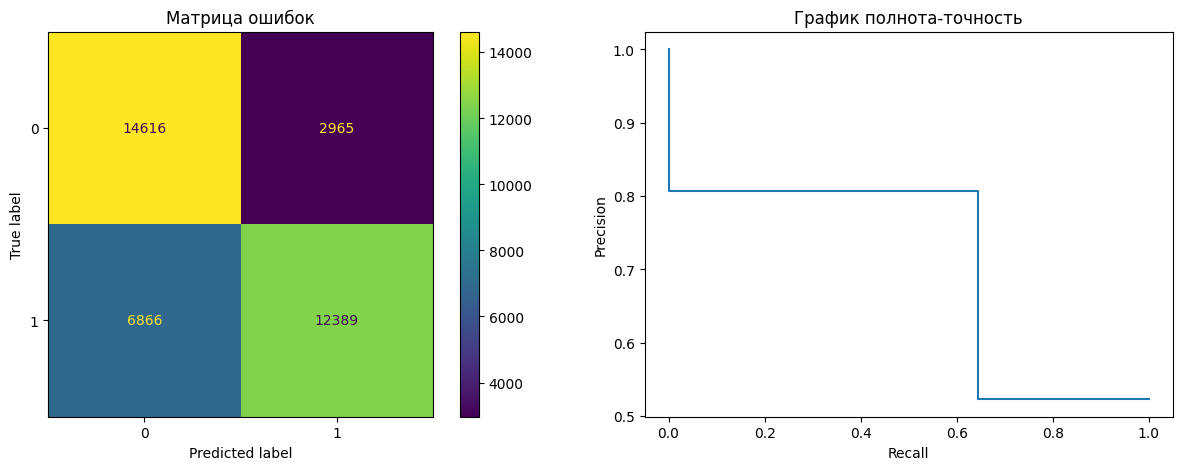

In [73]:
cm = confusion_matrix(y_test, prediction_gbm, labels=gs_gbm.classes_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
cmd = ConfusionMatrixDisplay(cm, display_labels=gs_gbm.classes_)
cmd.plot(ax=ax1)
ax1.set_title('Матрица ошибок')
prec, recall, _ = precision_recall_curve(y_test, prediction_gbm)
PrecisionRecallDisplay(prec, recall).plot(ax=ax2)
ax2.set_title('График полнота-точность')
plt.show()

Для анализа факторов влияющих на вероятность стать виновником ДТП воспользуемся библиотекой SHAP.

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\shap\explainers\_tree.py:353: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



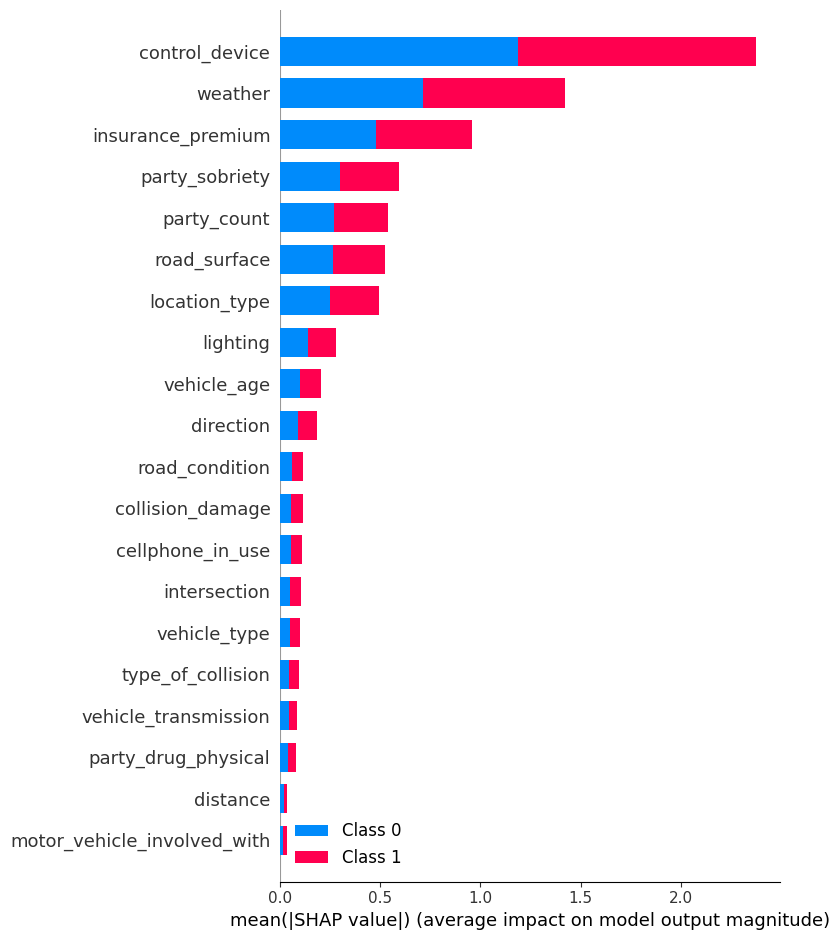

In [74]:
X_encoded = gs_gbm.best_estimator_['columntransformer'].fit_transform(X)
model = gs_gbm.best_estimator_['lgbmclassifier'].fit(X_encoded, y)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_encoded)

shap.summary_plot(shap_values, X)

В абсолютных выличинах на решение о виновности в ДТП больше всего влияют:
   * наличие контрольного устройства в машине
   * погодные условия
   * состояние дороги
   * тип трансмиссии
   
Погодные условия и состояние дороги одинаковые для участников движения, поэтому проанализируем зависимость вероятности стать виновником ДТП от наличия контролирующего устройства и от типа трасмиссии.

In [ ]:
fig = px.histogram(
    df, x='control_device', color='at_fault',
    barmode='group',
    title='Зависимость виновности в ДТП от состояния контролирующего устройства (количество)',
    histfunc='count'
)
fig.show()

In [ ]:
fig = px.histogram(
    df, x='vehicle_transmission', color='at_fault',
    barmode='group',
    title='Зависимость виновности в ДТП от типа трансмиссии (количество)',
    histfunc='count'
)
fig.show()

### Выводы

В случае с контролирующими устройствами мы получили закономерный результат: сам факт наличия в машине контрольного устройства влияет на аккуратность водителя. Если оно есть и функционирует - водители реже становятся виновными в ДТП.

Зависимость виновности от типа трансмиссии неожиданно сильная. С автоматической трасмиссией вероятность ниже, а с механической выше. Возможно, сказывается тот факт что пользователям с МКПП нужно чаще отвлекаться на переключение передач и у них чаще занята одна из рук.

Заказчику можно порекомендовать:
   * оборудовать все автомобили устройствами контроля (видеокамерой в салон) и извещать об этом пользователей;
   * приобретать АМ с автоматической КПП.

## Заключение

В данной работе мы попытались создать систему для каршеринговой компании, которая могла бы оценить риск ДТП по совокупности факторов.

Мы исследовали предоставленную базу, провели статистический анализ некоторых факторов.

Подготовили данные для анализа за 2012 год. Опробовали ряд моделей классического машинного обучения и бустингов.

Испытанные модели показали лУчшие результаты по сравнению со случайными моделями, что говорит о том что внедрение данных систем позволит улучшить вероятность опознать потенциального виновника ДТП по ряду признаков.

Мы увидели что самыми влияющими факторами являются (если отсеять одинаковые для всех сторон факторы):

   * наличие контрольного устройства в машине
   * тип трансмиссии
   * трезвость
   * использование телефона
   * влияние лекарств
   
Мы показали что сам факт наличия контролирующего устройства в машине и знание об этом водителя влияет на вероятность попасть в аварию.

Сильное влияние оказывает тип трасмиссии, все машины надо переводить на АКПП.

Общий вклад трезвости, использования телефона и влияния лекарств довольно велик и его стоит учитывать. В машины стоит установить контрольное устройство. Возможно, добавить в камеру систему определения физического состояния водителя по времени реакции на раздражители, скорость моргания и сфокусированность зрения на дороге с включением звуковой сигнализации если водитель начинает спать или долго не смотрит на дорогу.